In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

## Import Data

In [52]:
earnings_path = 'data\\processed\\df_quarter_eps_average_08_09.csv'
roe_path = 'data\\processed\\df_quarter_roe_average_08_09.csv'
key_path = 'data\\external\\quarterly_key_sp_500.csv'

In [3]:
df_eps = pd.read_csv(earnings_path)
df_eps.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df_eps.index = df_eps['Stock']
df_eps.drop('Stock', axis=1, inplace = True)

In [4]:
df_eps

,Recession EPS,Average EPS
Stock,,
AAN,0.49000,0.497708
AAPL,1.45250,4.532708
AAP,0.67000,1.230625
AA,-0.55500,-0.019542
ABC,0.70000,0.710417
...,...,...
XRX,0.12775,0.167521
X,0.90750,-0.126458
YUM,0.54250,0.743542


In [5]:
df_roe = pd.read_csv(roe_path)
df_roe.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df_roe.index = df_roe['Stock']
df_roe.drop('Stock', axis=1, inplace = True)

In [6]:
df_roe

,Recession ROE,Average ROE
Stock,,
AAN,0.127850,0.120373
AAPL,0.235625,0.351127
AAP,0.231750,0.253342
AA,-0.025475,-0.011304
ABMD,-0.309000,0.003308
...,...,...
XRAY,0.174200,0.090254
XRX,0.062900,0.064767
X,0.252875,-0.069517


In [55]:
df_key = pd.read_csv(key_path)
df_key.index = df_key['symbol']
df_key.drop(['symbol', 'Unnamed: 2'], axis=1, inplace=True)

In [ ]:
df_key

## Exploratory Scatterplots

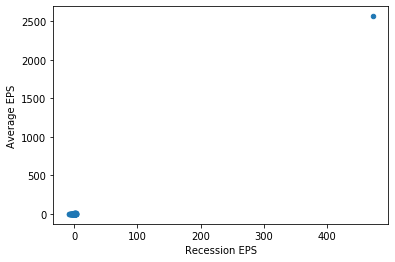

In [8]:
# this one outlier is skewing the plot
# it fails to meet the criteria for our hypothesis so lets drop it

df_eps.plot(kind='scatter', x='Recession EPS', y='Average EPS')

In [15]:
df_eps.sort_values(by=['Average EPS'], ascending=False, inplace=True)
df_eps.head()

,Recession EPS,Average EPS
Stock,,
BRK.A,472.7650,2564.039792
WPO,0.5925,9.365625
PCLN,1.3125,8.120833
AZO,2.8625,7.025000
GOOG,3.6350,6.487708


In [16]:
df_eps.drop(['BRK.A'], inplace=True)
df_eps.head()

,Recession EPS,Average EPS
Stock,,
WPO,0.5925,9.365625
PCLN,1.3125,8.120833
AZO,2.8625,7.025000
GOOG,3.6350,6.487708
AAPL,1.4525,4.532708


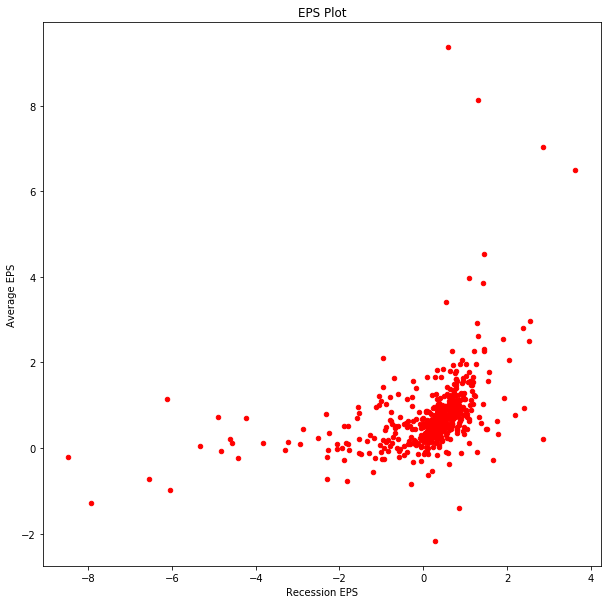

In [22]:
df_eps.plot(kind='scatter', x='Recession EPS', y='Average EPS', title='EPS Plot', figsize=(10,10), color='r')

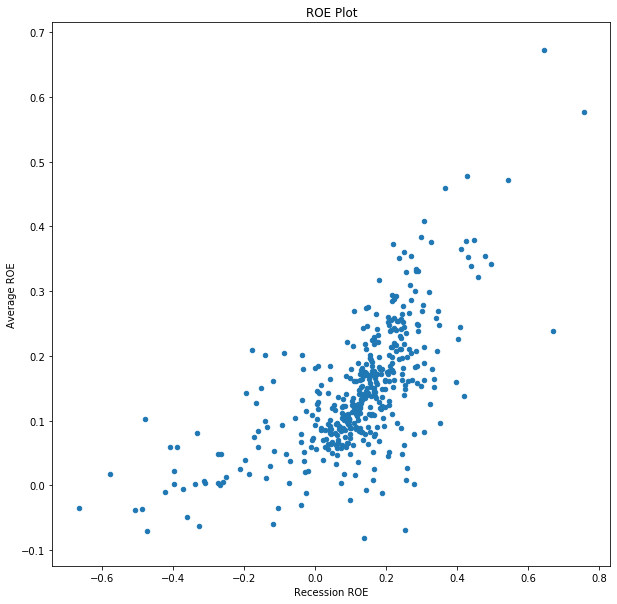

In [21]:
df_roe.plot(kind='scatter', x='Recession ROE', y='Average ROE', title='ROE Plot', figsize=(10,10))

## Implementing Hypothesis

In [40]:
df_eps['hypothesis']=np.where(df_eps['Recession EPS']>=df_eps['Average EPS'], 1, 0)

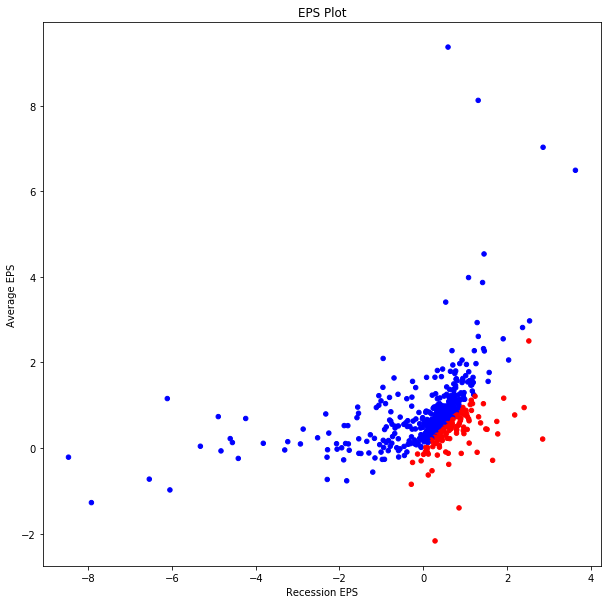

In [41]:
colors = {1:'red', 0:'blue'}
df_eps.plot(kind='scatter', x='Recession EPS', y='Average EPS', title='EPS Plot', figsize=(10,10), 
            c=df_eps['hypothesis'].apply(lambda x: colors[x]))

In [42]:
df_roe['hypothesis']=np.where(df_roe['Recession ROE']>=df_roe['Average ROE'], 1, 0)

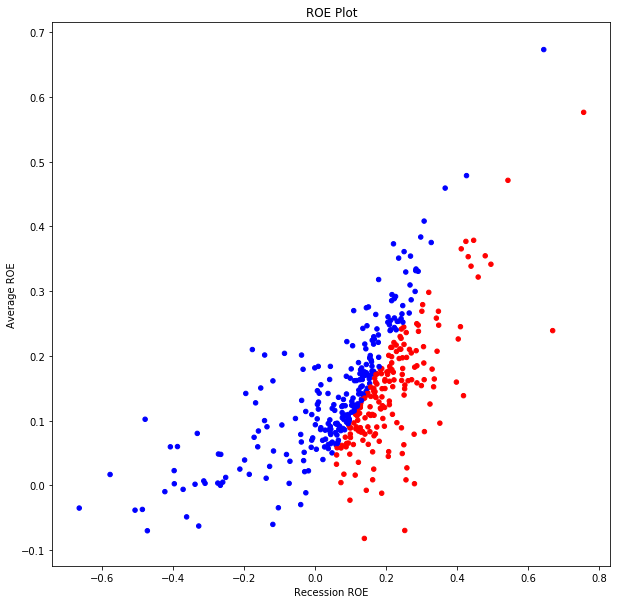

In [43]:
df_roe.plot(kind='scatter', x='Recession ROE', y='Average ROE', title='ROE Plot', figsize=(10,10), 
            c=df_roe['hypothesis'].apply(lambda x: colors[x]))

## Candidate Stock Dataframes

In [44]:
df_eps_cand = df_eps[df_eps['hypothesis']==1]

In [45]:
df_eps_cand

,Recession EPS,Average EPS,hypothesis
Stock,,,
CME,2.5225,2.500000,1
BDX,1.2375,1.208958,1
FLS,1.9225,1.163750,1
JNJ,1.1475,1.115000,1
SRE,1.1775,1.037083,1
...,...,...,...
WIN,0.2100,-0.531667,1
CZN,0.1200,-0.631229,1
MBI,-0.2850,-0.848125,1


In [50]:
df_eps_cand['difference'] = df_eps_cand['Recession EPS'] - df_eps_cand['Average EPS']
df_eps_cand.sort_values(by='difference', ascending=False, inplace=True)
df_eps_cand.head(30)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Recession EPS,Average EPS,hypothesis,difference
Stock,,,,
RIG,2.8525,0.208542,1,2.643958
SHLD,0.2825,-2.171042,1,2.453542
BTU,0.8550,-1.399792,1,2.254792
NRG,1.6575,-0.288542,1,1.946042
DO,2.4100,0.943958,1,1.466042
ESV,1.7800,0.328542,1,1.451458
EOG,2.1850,0.771458,1,1.413542
APC,1.2875,-0.100833,1,1.388333
FSLR,1.7575,0.620417,1,1.137083


In [46]:
df_roe_cand = df_roe[df_roe['hypothesis']==1]

In [47]:
df_roe_cand

,Recession ROE,Average ROE,hypothesis
Stock,,,
AAN,0.127850,0.120373,1
ABT,0.272200,0.163335,1
ADBE,0.188625,0.136823,1
ADI,0.245750,0.171502,1
ADM,0.161475,0.109719,1
...,...,...,...
XLNX,0.222375,0.220785,1
XOM,0.343750,0.207310,1
XRAY,0.174200,0.090254,1


In [51]:
df_roe_cand['difference'] = df_roe_cand['Recession ROE'] - df_roe_cand['Average ROE']
df_roe_cand.sort_values(by='difference', ascending=False, inplace=True)
df_roe_cand.head(30)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Recession ROE,Average ROE,hypothesis,difference
Stock,,,,
APU,0.669000,0.239146,1,0.429854
X,0.252875,-0.069517,1,0.322392
MOS,0.418125,0.138679,1,0.279446
AES,0.280125,0.002713,1,0.277413
AIV,0.351575,0.096227,1,0.255348
CZN,0.256275,0.008665,1,0.247610
DO,0.398125,0.159654,1,0.238471
RIG,0.258825,0.027179,1,0.231646
NE,0.308150,0.083183,1,0.224967
